 create struct to house important data (If changed need to restart notebook)

In [4]:
mutable struct PersonInformation
    ekg_reading
    pr_interval
    qrs_interval
    st_segment
    qt_interval
    pwave_area
end

methods to convert .csv data into structs

In [5]:
#patients =Array{PersonInformation,1}

function getPatient(fileName::String,n)
    inputFile = open(fileName)
    currentline = readline(inputFile)
    currentline = readline(inputFile)
    person =Array{Float64,1}
    
    while(!isempty(currentline))
        timex= split(currentline, ",")
        txp = parse(Float64,timex[n])
        person= cat(person,txp;dims=1)
        currentline = readline(inputFile)
    end
    deleteat!(person,1)
    p=PersonInformation(person,0.0,0.0,0.0,0.0,0.0)
    close(inputFile)
    return p
end
        
function readOneFile(fileName::String)
    inputFile = open(fileName)
    patients =Array{PersonInformation,1}
    rowLength =length(split(readline(inputFile),","))
    close(inputFile)
    if(rowLength==3)
        patients = cat(patients,getPatient(fileName,3);dims=1)
    elseif(rowLength>3)
        n=0
        while((2*n)+3<=rowLength)
            patient =getPatient(fileName,(2*n)+3)
            patients = cat(patients,patient;dims=1)
            n+=1
        end
    else
        return error("The length of rows is incompatable")
    end
    return patients
end

function readAllFiles(dir ::String)
    inputFiles= readdir(dir)
    patients =Array{PersonInformation,1}
    for fileName in inputFiles
        readOneFile(dir*"/"*fileName)
    end

    return patients
end

readAllFiles (generic function with 1 method)

stuff afterwards

1) plot showcase graphs with GadFly
2) instruct clinician how to view and interpret data on own
3) *disclaimer in alpha*
4) work on analysis portions

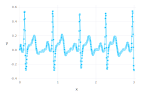

In [6]:
using Gadfly;
p =getPatient("patients/patient14.csv",3)
t=map(x-> 0.005*(x-1),keys(p.ekg_reading))
y1=map(y->y, values(p.ekg_reading))
plot(layer(x=t,y=y1),layer(x=t,y=y1,Geom.line))

Here is how you can analyze this EKG


Utilize additional patient data of sex, race, heart rate and age. 


Some Checks for the Clinician:


	
 On average is there one Pwave per QRS complex?
	

		
If there is not and if there is more than 1 p-wave per QRS, then there could be a possible atrial flutter
		If there are no p-waves, then there is a possible atrial standstill
	
	
	 Does more than 1 Twave follow the QRS complex?
	

		
This could be possible hypokalemia
	
	
	 Is the QT interval less than half of the R-R interval?
	

		
There are many possible problems (would require further examination)
	
	
	 Is the deflection of the Twave positive?
	

		
Depending on the person’s descent, there is a possible ischemia or previous heart attack
	
	
	 Is the slope of the ST interval positive, negative, or zero?
	

		
If it is positive, then there is a possible previous heart attack
		If it is negative, then there is possible ischemia
		

			
If the deflection of the T-wave is negative, then there is a possible strain (very big problem)
		
		
	
	
	 Is the height of the Qwave greater than one third of the height of the R-wave?
	

		
If it is, then it is a possible sign of a previous heart attack

## this analysis portion is still in alpha

In [7]:
using Interpolations;
itp= interpolate(y1)

MethodError: MethodError: no method matching interpolate(::Array{Float64,1})
Closest candidates are:
  interpolate(::AbstractArray, !Matched::NoInterp) at C:\Users\Trenton\.julia\packages\Interpolations\TuOdO\src\nointerp\nointerp.jl:2
  interpolate(::AbstractArray, !Matched::IT<:Union{NoInterp, Tuple{Vararg{Union{NoInterp, BSpline},N} where N}, BSpline}) where IT<:Union{NoInterp, Tuple{Vararg{Union{NoInterp, BSpline},N} where N}, BSpline} at C:\Users\Trenton\.julia\packages\Interpolations\TuOdO\src\b-splines\b-splines.jl:152
  interpolate(::AbstractArray{#s35,1} where #s35<:Number, !Matched::AbstractArray{TEl,1}, !Matched::TInterpolationType<:Interpolations.MonotonicInterpolationType) where {TEl, TInterpolationType<:MonotonicInterpolationType} at C:\Users\Trenton\.julia\packages\Interpolations\TuOdO\src\monotonic\monotonic.jl:180
  ...

In [8]:
age= 20#this would be where the clinician enters important factors to continue
y2= deepcopy(y1)
patientcopy=deepcopy(p.ekg_reading)
maximumvalues=Array{Float64,1}
Rpeak1=maximum(y2)

maximumvalues=cat(maximumvalues,Rpeak1;dims=1)
deleteat!(maximumvalues,1)
x=0.0
for i in length(y2)
    if y2[i] >= Rpeak1
        
    end
end
tInterval= (30/(200-age))
start=x-tInterval

deleteat()

    

UndefVarError: UndefVarError: deleteat not defined

In [9]:
function getMaximums(person)
    couter = 1
    runCount = 1
    age = 20
    truePerson=deepcopy(person)
    currentHighest = truePerson.first
    xValuesToAvoid = Array{Array{-.1,-.1}}
    inxrange = false
    maximums = Array{currentHighest}

 

    while(counter < 11)
        for i in truePerson
            for k in xValuesToAvoid
                # Figure out if the variable is in the range of xvalues 
                # that are not possible for a maximum
                if k[1] < i.first && k[2] > i.first
                    inxrange = true
                end
            end
        end
        if i.second > currentHighest.second && !(inxrange)
            currentHighest = i 
        end
        runCount += 1
        currentHighest = cat(i.first-(30/(220-age)),i.first+(30/(220-age))# limit because of maximum heartbeat
    end
    maximums cat(currentHighest)
    runCunt = 0
    counter += 1
end

LoadError: syntax: missing comma or ) in argument list